In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [2]:
df = pd.read_csv("/content/car_data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
# Checking if our dataset contains any Null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Counting values of some features

df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [7]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [8]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

Encoding the data

In [9]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}, 'Seller_Type':{'Dealer':0, 'Individual':1}, 'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
X = df.drop(['Selling_Price', 'Car_Name'], axis = 1)
y = df['Selling_Price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#### Model Training

1. Using Linear Regression Model
Linear Regression Model works better when there's a direct correlation between the feature and the target value.

In [24]:
l_model = LinearRegression()

In [25]:
l_model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = l_model.predict(X_test)

In [42]:
### Evaluating Model using R squared error
error_score = metrics.r2_score(y_test, y_pred)

In [43]:
print('R sqaure Error :', error_score)

R sqaure Error : 0.3931106765727391


Visualizing the actual target value and predicted target value

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

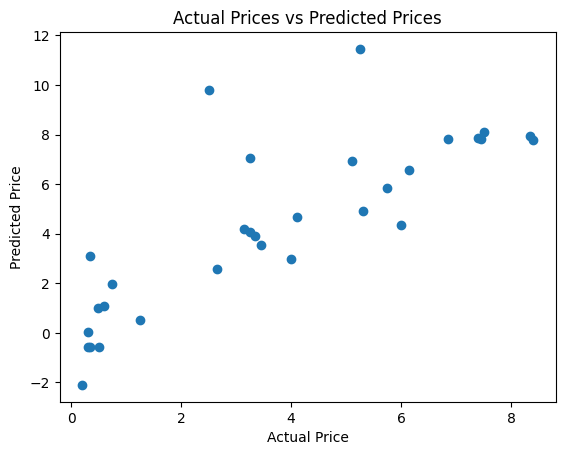

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')

2. Using Lasso Regression

In [44]:
ls_model = Lasso()

In [45]:
ls_model.fit(X_train, y_train)

Lasso()

In [46]:
y_pred = ls_model.predict(X_test)

In [47]:
err_score = metrics.r2_score(y_test, y_pred)

In [48]:
print("R square error using Lasso Regression Model :", err_score)

R square error using Lasso Regression Model : 0.46123204958260644


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

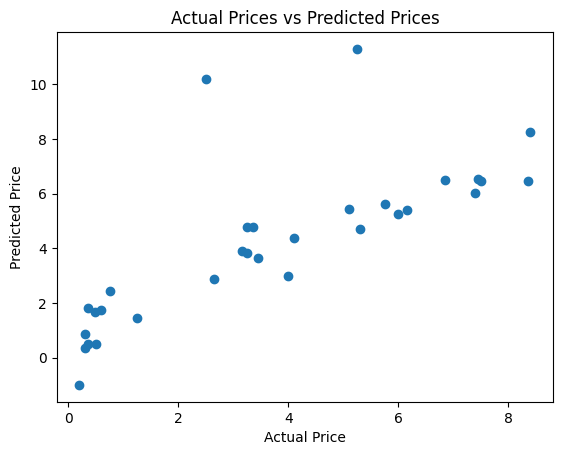

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')